In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
val_images=val_images.reshape(10000, 28, 28, 1)
val_images=val_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, validation_data=(val_images, val_labels), epochs=20)



1/1 [==============================] - 0s 21ms/step


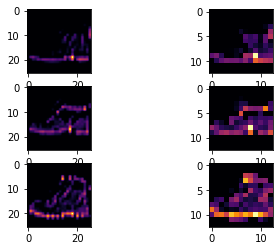

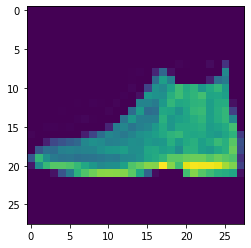

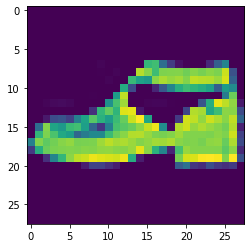

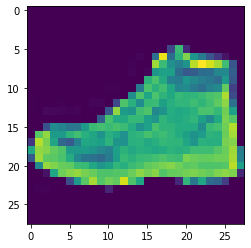

In [3]:
#pooling

import matplotlib.pyplot as plt
def show_image(img):
  plt.figure()
  plt.imshow(val_images[img].reshape(28,28))
  plt.grid(False)
  plt.show()  

f, axarr = plt.subplots(3,2)
# By scanning the list above I saw that the 0, 23 and 28 entries are all label 9 
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28

# For shoes (0, 23, 28), Convolution_Number=1 (i.e. the second filter) shows
# the sole being filtered out very clearly

CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(val_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(val_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(val_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

show_image(FIRST_IMAGE)
show_image(SECOND_IMAGE)
show_image(THIRD_IMAGE)